# Klasifikasi Faktor Risiko Diabetes Menggunakan Decision Tree Studi Kasus pada Dataset Pima Indian Diabetes. 



In [9]:
import pandas as pd
# Load data
data = pd.read_csv('diabetes2.csv')
data.head(10)
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8     

### Eksplorasi Data

Visualisasi data

In [10]:
display(data) #display dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
data.columns = data.columns.str.strip()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13516\3816215814.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=data, palette='viridis')


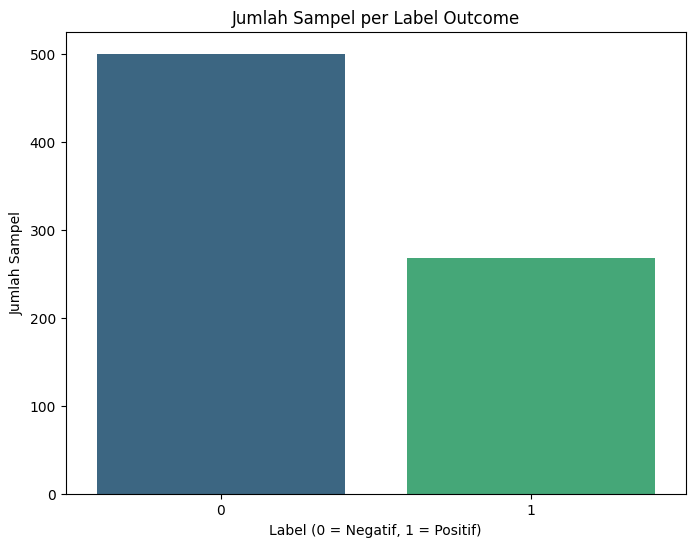

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Contoh loading dataset, asumsi sudah dalam format .csv atau dataframe bernama 'data'
# data = pd.read_csv('nama_file.csv')

# Kalau datanya sudah ada, lanjut visualisasi
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=data, palette='viridis')
plt.title('Jumlah Sampel per Label Outcome')
plt.xlabel('Label (0 = Negatif, 1 = Positif)')
plt.ylabel('Jumlah Sampel')
plt.show()


<Figure size 1200x1000 with 0 Axes>

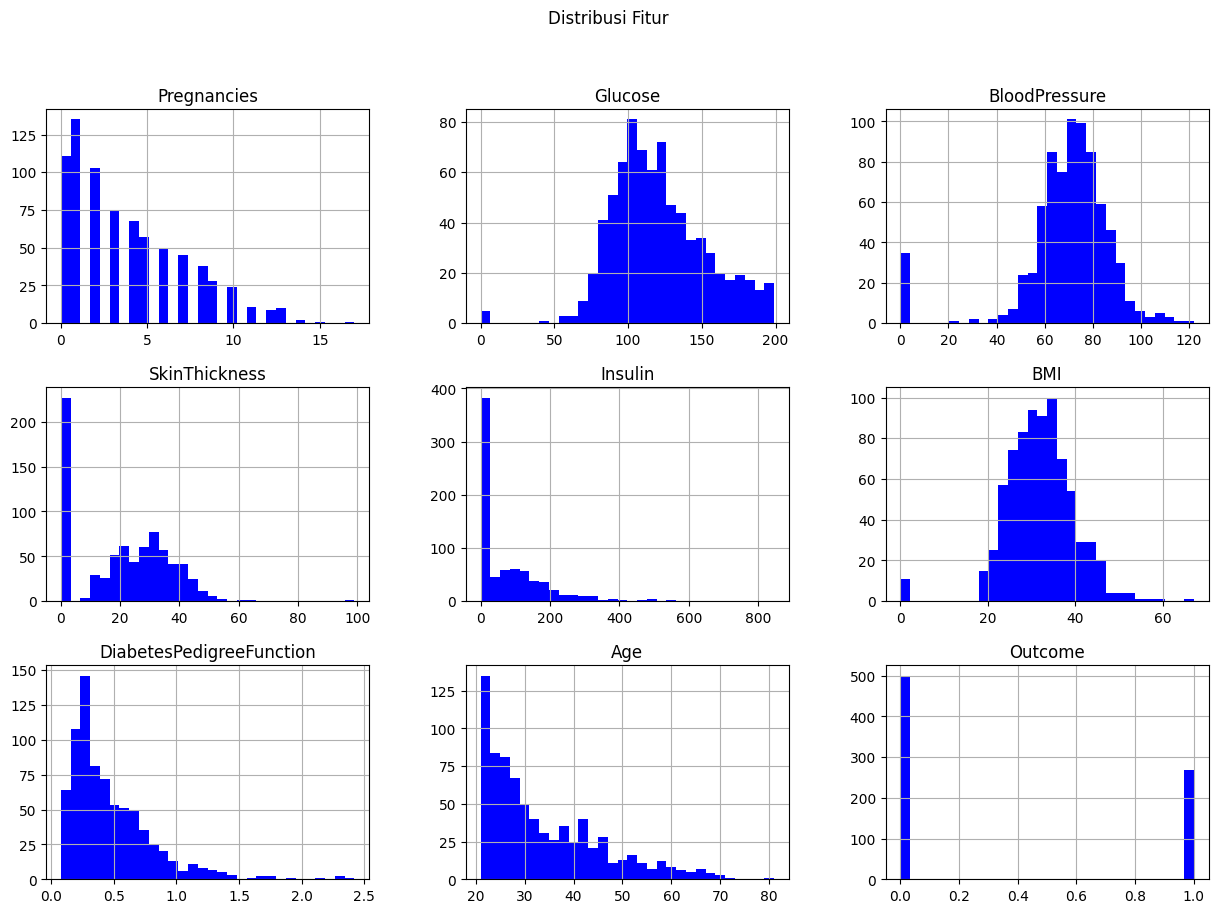

In [14]:
# Visualisasi distribusi fitur dengan histogram
plt.figure(figsize=(12, 10))
data.hist(bins=30, figsize=(15, 10), color='blue')
plt.suptitle('Distribusi Fitur')
plt.show()

# Struktur Data

### Fitur dan Label

In [15]:
data.shape #untuk mengetahui bentuk dataset(baris & kolom)

(768, 9)

Terdapat 961 baris dan 6 kolom.

In [17]:
print(data.columns.tolist())


['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [ ]:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Fitur adalah atribut atau variabel independen dalam dataset yang digunakan untuk membuat prediksi

Jumlah Fitur: 8 fitur + 1 label  
 
Daftar Fitur:  

Pregnancies : Jumlah kehamilan  

Glucose : Kadar glukosa darah (mg/dL)  

BloodPressure : Tekanan darah diastolik (mm Hg)  

SkinThickness : Ketebalan lipatan kulit (mm)  

Insulin : Kadar insulin dalam darah (mu U/ml)  

BMI : Indeks massa tubuh (berat badan/(tinggi badan)^2)  

DiabetesPedigreeFunction : Riwayat keturunan diabetes  

Age : Usia (tahun)  

Label (Target):  

Outcome :  

1 → Positif Diabetes   

0 → Negatif Diabetes  

Kegunaan Dataset:  

Untuk modeling klasifikasi diabetes menggunakan algoritma seperti Decision Tree, Naive Bayes, SVM, dll.  

In [18]:
data.dtypes #untuk mengetahui tipe data dari masing-masing kolom

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [19]:
data.groupby('Outcome').size() #untuk mengetahui jumlah masing-masing class

Outcome
0    500
1    268
dtype: int64

# Identifikasi Kualitas Dataset

### Deteksi missing value

Missing value merupakan data yang hilang pada suatu dataset. Hal ini bisa terjadi oleh beberapa faktor, diantaranya adalah :  

Interviewer recording error terjadi akibat kelalaian petugas pengumpul data (pewawancara), misalnya ada sejumlah pertanyaan yang terlewatkan.  

Respondent inability error terjadi akibat ketidakmampuan responden dalam memberikan jawaban akurat, misalnya karena tidak memahami  pertanyaan, bosan atau kelelahan (respondent fatigue) akhirnya responden mengosongkan sejumlah pertanyaan atau berhenti mengisi kuesioner di tengah jalan.  

Unwillingness respondent error terjadi karena responden tidak berkenan memberikan jawaban yang akurat, misalnya pertanyaan soal penghasilan, usia, berat badan, pengalaman melakukan pelanggaran hukum, dll.  

Cara penanganan Missing Values :  

Mengabaikan dan membuang missing data.  

Estimasi parameter.  

Imputasi.  

Dalam modul kali ini saya akan menangani missing values menggunakan metode imputasi, yang ada 2 metode yaitu menggunakan metode Mean dan menggunakan metode KNN.  

pada kolom di bawah ini akan dilakukan pendeteksian missing values terlebih dahulu pada masing-masing kolom.  

In [ ]:
atribut = ['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction', 'Age']
data[atribut] = data[atribut].apply(pd.to_numeric, errors='coerce')

# Representasi Jumlah Record Data
print("Representasi Jumlah Record:")
print("Jumlah record:", len(data))
print("Jumlah fitur:", data.shape[1])

# Jumlah Kelas (Outcome)
print("\na. Jumlah Kelas (Outcome):")
kelas_counts = data['Outcome'].value_counts().sort_index()
print(f"Kelas 0 = {kelas_counts.get(0, 0)} Negatif Diabetes")
print(f"Kelas 1 = {kelas_counts.get(1, 0)} Positif Diabetes")
print(f"Total semua kelas = {kelas_counts.sum()}")

# Jumlah Missing Value (nilai 0 dianggap missing)
print("\nb. Jumlah Missing Value (nilai 0 dianggap missing):")
missing_counts = (data[atribut] == 0).sum()
print(missing_counts.to_string())
print(f"\nTotal missing value dari semua kolom (bernilai 0): {missing_counts.sum()}")

== PREPROSESING ==
Representasi Jumlah Record:
Jumlah record: 768
Jumlah fitur: 9

a. Jumlah Kelas (Outcome):
Kelas 0 = 500 Negatif Diabetes
Kelas 1 = 268 Positif Diabetes
Total semua kelas = 768

b. Jumlah Missing Value (nilai 0 dianggap missing):
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0

Total missing value dari semua kolom (bernilai 0): 763


# Preprocessing Data

## Transformasi Data

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 2. Cek isi kolom dan tipe datanya
print("\nKolom dataset:")
print(data.columns)
print("\nTipe data per kolom:")
print(data.dtypes)
print("\nNilai unik di kolom 'Outcome':")
print(data['Outcome'].unique())

data['Outcome'] = data['Outcome'].replace({0: 'Tidak Diabetes', 1: 'Diabetes'})

print("\nContoh data setelah label diganti:")
print(data.head())

# plt.figure(figsize=(8, 6))
# sns.countplot(x='Outcome', data=data, palette='viridis')
# plt.title('Distribusi Label Diabetes')
# plt.xlabel('Outcome (Negatif = Tidak Diabetes, Positif = Diabetes)')
# plt.ylabel('Jumlah Sampel')
# plt.show()


Kolom dataset:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Tipe data per kolom:
Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                      object
dtype: object

Nilai unik di kolom 'Outcome':
['Diabetes' 'Tidak Diabetes']

Contoh data setelah label diganti:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984       0.23232

## Imputasi Missing Value

### Mean  
setelah missing value terdeteksi, kita perlu untuk mengisi data yang kosong dengan data yang pas agar data dapat digunakan, ada banyak cara untuk mengisi missing value antara lain yaitu dengan menggunkan metode mean,pada tahap ini kita akan melakukan imputasi dengan metode mean.  

Untuk langkah-langkah nya sebagai berikut:  

hitung rata rata setiap kolom pada ‘data’ lalu simpan hasilnya di suatu variable disini saya mendefinisikan ‘mean_values’  

gunakan metode dari pandas untuk mengisikan/mengantikan value yang kosong/hilang pada dataFrame. saya disini untuk mengisi value yang kosong dengan menjumlahkan rata-rata dari setiap kolom  

In [100]:
import pandas as pd
import numpy as np

# Load dataset
data = pd.read_csv('diabetes2.csv')


# Identifikasi semua kolom fitur kecuali 'Severity'
fitur = data.columns[data.columns != 'Outcome'].tolist()

# Ubah nilai 0 menjadi NaN di semua kolom fitur
data[fitur] = data[fitur].replace(0, np.nan)

# Hitung mean tiap kolom (fitur saja)
mean_values = data[fitur].mean()

# Isi missing value dengan mean
data_filled = data.copy()
data_filled[fitur] = data_filled[fitur].fillna(mean_values)

# Tampilkan hasil
print("Ini hasil perhitungan mean menggunakan fillna:")
print(mean_values)
print("\n")

print("Input tiap kolom missing dengan mean")
print("Jika output false berarti sudah tidak ada missing value:")
print(data_filled.isnull())
print("\n")

print("Melihat secara tiap kolom apakah masih ada missing value:")
print(data_filled.isnull().any())
print("\n")

# Hitung total missing value per kolom
missing_counts = data_filled.isnull().sum()

print("Jumlah Missing Value per kolom:")
print(missing_counts)

# Simpan hasil ke file CSV
# data_filled.to_csv("diabetes2_mean.csv", index=True)


Ini hasil perhitungan mean menggunakan fillna:
Pregnancies                   4.494673
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
dtype: float64


Input tiap kolom missing dengan mean
Jika output false berarti sudah tidak ada missing value:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763  

### KNN

Pada tahapan ini kami akan melakukan imputasi missing value dengan metode KNN dengan perhitungan jarak menggunakan rumus euclidien distance.  

Langkah-langkah KNN :  
$$d(x, y) = \sqrt{ \sum_{i=1}^{n} (x_i - y_i)^2 }$$  


Tentukan jumlah tetangga (K) yang akan digunakan untuk pertimbangan penentuan kelas (metode cross validation)   

Hitung jarak dari data baru ke masing-masing data point di dataset (eulidien distance).  

Ambil tetangga terdekat menurut K, kemudian hitung rata-ratanya.  


Sedangkan untuk mencari nilai K terbaik kami menggunakan Cross validation.  

K-Fold Cross Validation atau lebih sering disebut cross validation adalah salah satu teknik yang populer dipakai dalam evaluasi model ML. Pada cross validation dataset dibagi sebanyak K lipatan. Pada setiap iterasi setiap lipatan akan dipakai satu kali sebagai data uji dan lipatan sisanya dipakai sebagai data latih. Dengan menggunakan cross validation kita akan memperoleh hasil evaluasi yang lebih akurat karena model dievaluasi dengan seluruh data.

Jumlah data latih: 268
Jumlah data uji: 68
Nilai K yang akan diuji: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


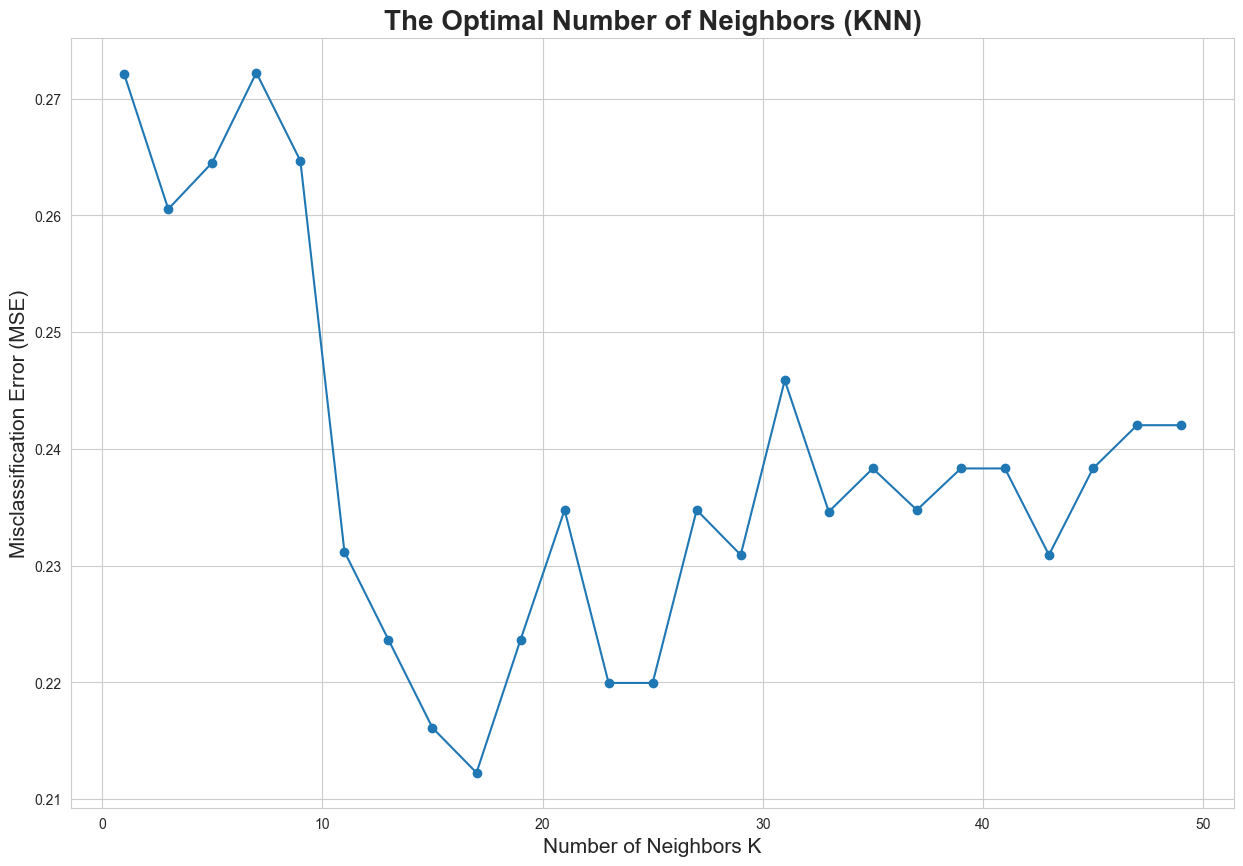

The optimal number of neighbors is 17.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Supaya grafik tampil langsung di notebook (kalau pakai Jupyter)
%matplotlib inline

# -----------------------------
# 1. Load Dataset
# -----------------------------
df = pd.read_csv('diabetes2.csv')

# -----------------------------
# 2. Preprocessing
# -----------------------------
# Identifikasi fitur (selain kolom 'Outcome')
feature_columns = df.columns[df.columns != 'Outcome']

# Anggap nilai 0 sebagai missing value di semua fitur (umum di dataset diabetes)
df[feature_columns] = df[feature_columns].replace(0, np.nan)

# Ambil hanya data yang tidak memiliki missing value
data_clean = df.dropna()

# Cek dimensi data bersih
print(f"Dimensi data tanpa nilai yang hilang: {data_clean.shape}")

# -----------------------------
# 3. Split Fitur & Label
# -----------------------------
X = data_clean[feature_columns].values
y = data_clean['Outcome'].values

# Split data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")

# -----------------------------
# 4. KNN & Cross Validation
# -----------------------------
k_list = list(range(1, 50, 2))
print(f"Nilai K yang akan diuji: {k_list}")

cv_scores = []

# 10-fold Cross Validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# -----------------------------
# 5. Visualisasi Error
# -----------------------------
MSE = [1 - score for score in cv_scores]

plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")
plt.title('The Optimal Number of Neighbors (KNN)', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error (MSE)', fontsize=15)
plt.plot(k_list, MSE, marker='o')
plt.show()

# -----------------------------
# 6. K Terbaik
# -----------------------------
best_k = k_list[MSE.index(min(MSE))]
print(f"The optimal number of neighbors is {best_k}.")


Setelah didapati jumlah K terbaik, maka kita coba cek akurasinya.

In [91]:
classifier = KNeighborsClassifier(n_neighbors=23)

# Melatih model
classifier.fit(X_train, y_train)

# Memprediksi data uji
y_pred = classifier.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred) * 100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 75.97 %.


In [88]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Load dataset
df = pd.read_csv('diabetes2.csv')

# Identifikasi semua fitur kecuali Outcome
fitur = df.columns[df.columns != 'Outcome']

# Anggap nilai 0 sebagai missing value
df[fitur] = df[fitur].replace(0, np.nan)

# Inisialisasi KNNImputer
imputer = KNNImputer(n_neighbors=23, metric='nan_euclidean')

# Lakukan imputasi hanya pada fitur, label tidak disentuh
fitur_imputed = imputer.fit_transform(df[fitur])

# Gabungkan hasil imputasi dengan kolom Outcome
data_imputed_df = pd.DataFrame(fitur_imputed, columns=fitur)
data_imputed_df['Outcome'] = df['Outcome'].values

# Cek missing value
missing_counts = data_imputed_df.isnull().sum()

print("--------------------------- Missing Value Counts ---------------------------".center(100))
print(missing_counts)

print()
print("--------------------------- Hasil Data yang Sudah Diimputasi ---------------------------")

# List indeks contoh untuk ditampilkan (pastikan tidak melebihi jumlah baris dataset)
indeks_tampilkan = [2,3,4, 12, 25, 30, 45, 67, 100, 150]

data_tampil = data_imputed_df.iloc[indeks_tampilkan]
print(data_tampil)


            --------------------------- Missing Value Counts ---------------------------            
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

--------------------------- Hasil Data yang Sudah Diimputasi ---------------------------
     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
2       8.000000    183.0           64.0      28.260870  249.434783  23.3   
3       1.000000     89.0           66.0      23.000000   94.000000  28.1   
4       4.565217    137.0           40.0      35.000000  168.000000  43.1   
12     10.000000    139.0           80.0      27.782609  191.217391  27.1   
25     10.000000    125.0           70.0      26.000000  115.000000  31.1   
30      5.000000    109.0           75.0      26.000000  158.000

In [89]:
data_imputed_df.to_csv('diabetes2_knn_imputed.csv', index=False)
print("\nHasil imputasi berhasil disimpan ke 'diabetes2_knn_imputed.csv'")


Hasil imputasi berhasil disimpan ke 'diabetes2_knn_imputed.csv'


In [92]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset hasil imputasi (mean atau knn)
df = pd.read_csv('diabetes2_knn_imputed.csv')  # Atau ganti dengan dataset kamu yang udah bersih

# Pisahkan fitur dan label
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Cek distribusi sebelum SMOTE
print("Distribusi label sebelum SMOTE:")
print(y_train.value_counts())

# Inisialisasi dan terapkan SMOTE
smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Cek distribusi setelah SMOTE
print("\nDistribusi label setelah SMOTE:")
print(y_train_smote.value_counts())

# Latih model Decision Tree
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train_smote, y_train_smote)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))


Distribusi label sebelum SMOTE:
Outcome
0    393
1    221
Name: count, dtype: int64

Distribusi label setelah SMOTE:
Outcome
1    393
0    393
Name: count, dtype: int64

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       107
           1       0.56      0.72      0.63        47

    accuracy                           0.74       154
   macro avg       0.71      0.74      0.71       154
weighted avg       0.77      0.74      0.75       154


=== Confusion Matrix ===
[[80 27]
 [13 34]]


In [93]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset hasil imputasi (mean atau knn)
df = pd.read_csv('diabetes2_mean.csv')  # Atau ganti dengan dataset kamu yang udah bersih

# Pisahkan fitur dan label
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Cek distribusi sebelum SMOTE
print("Distribusi label sebelum SMOTE:")
print(y_train.value_counts())

# Inisialisasi dan terapkan SMOTE
smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Cek distribusi setelah SMOTE
print("\nDistribusi label setelah SMOTE:")
print(y_train_smote.value_counts())

# Latih model Decision Tree
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train_smote, y_train_smote)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))


Distribusi label sebelum SMOTE:
Outcome
0    393
1    221
Name: count, dtype: int64

Distribusi label setelah SMOTE:
Outcome
1    393
0    393
Name: count, dtype: int64

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.72      0.79       107
           1       0.55      0.77      0.64        47

    accuracy                           0.73       154
   macro avg       0.71      0.74      0.71       154
weighted avg       0.77      0.73      0.74       154


=== Confusion Matrix ===
[[77 30]
 [11 36]]


## Modeling

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# === Dataset MEAN ===
df_mean = pd.read_csv('diabetes2_mean.csv')
X = df_mean.drop('Outcome', axis=1).values
y = df_mean['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model_mean = DecisionTreeClassifier(random_state=0)
model_mean.fit(X_train, y_train)
y_pred = model_mean.predict(X_test)

print("=== Evaluasi Dataset Mean ===")
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# === Dataset KNN ===
df_knn = pd.read_csv('diabetes2_knn_imputed.csv')
X = df_knn.drop('Outcome', axis=1).values
y = df_knn['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model_knn = DecisionTreeClassifier(random_state=0)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

print("\n=== Evaluasi Dataset KNN ===")
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


=== Evaluasi Dataset Mean ===
Akurasi: 68.18%
Confusion Matrix:
[[77 30]
 [19 28]]

=== Evaluasi Dataset KNN ===
Akurasi: 72.08%
Confusion Matrix:
[[85 22]
 [21 26]]


In [ ]:
y_pred = model_knn.predict(X_test)

print("\n=== Hasil Prediksi ===")


# Deployment

In [82]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import joblib

# Load dataset
df = pd.read_csv('diabetes2_clean.csv')
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Training model
model = DecisionTreeClassifier(random_state=0)
model.fit(X, y)

# Simpan model ke file
joblib.dump(model, 'model_diabetes.pkl')
print("Model berhasil disimpan ke 'model_diabetes.pkl'")


Model berhasil disimpan ke 'model_diabetes.pkl'
